# 필기체 인식(114p)

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

# 레이블과 별도로 클래스명 따로 적는건, 0,1,2,3,4...
# 이렇게 나뉘어져 있지 않기 때문에 재정의.
class_names = ['0','1','2','3','4','5','6','7','8','9']
NUM_CLASSES = 10

In [17]:
from tensorflow.keras.utils import to_categorical

#normalization. 255로 나눈 값은 0~1 사이의 값이 됨
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print('converted y.shape = ', y_train.shape)

converted y.shape =  (60000, 10)


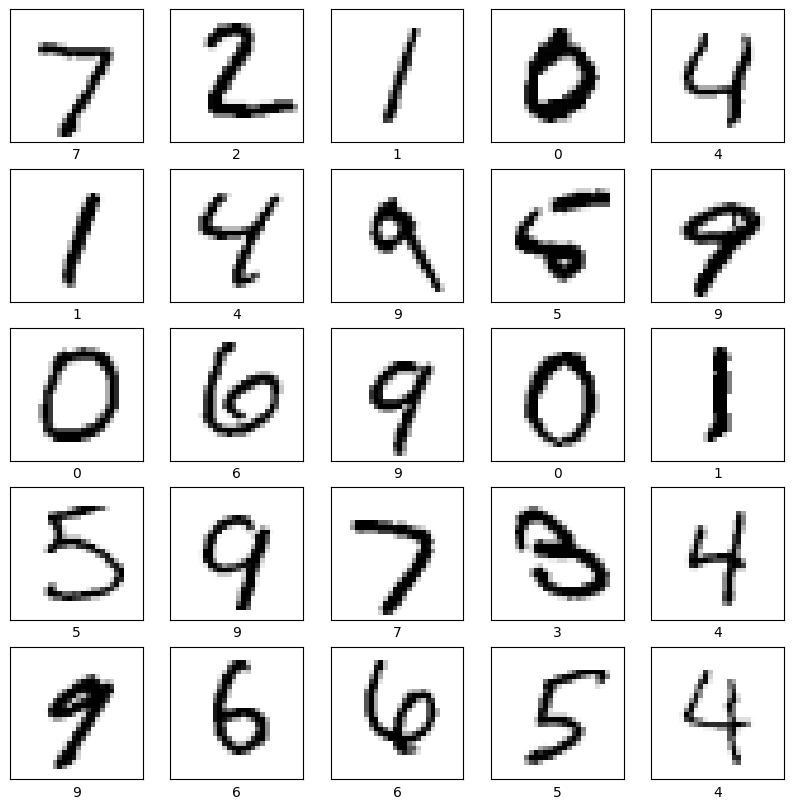

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i].argmax()])

# 115p

In [21]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model # 시각화용(?)
from tensorflow.keras.optimizers import Adam # 학습용

input_layer = Input((28,28))
x = Flatten()(input_layer) # 28*28로 생성
x = Dense(128, activation = 'relu')(x) #은닉층 128개 촘촘하게.. relu함수 사용
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x) #10개 출력할거고,  softmax함수 사용
model = Model(input_layer, output_layer)

In [ ]:
#여기는 다음주에 설명.

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.1915
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.4829
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.6472
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.7281
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.7818
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - accuracy: 0.8216
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0307 - accuracy: 0.8397
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.8510
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.8590
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.024

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 0.8775


In [25]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


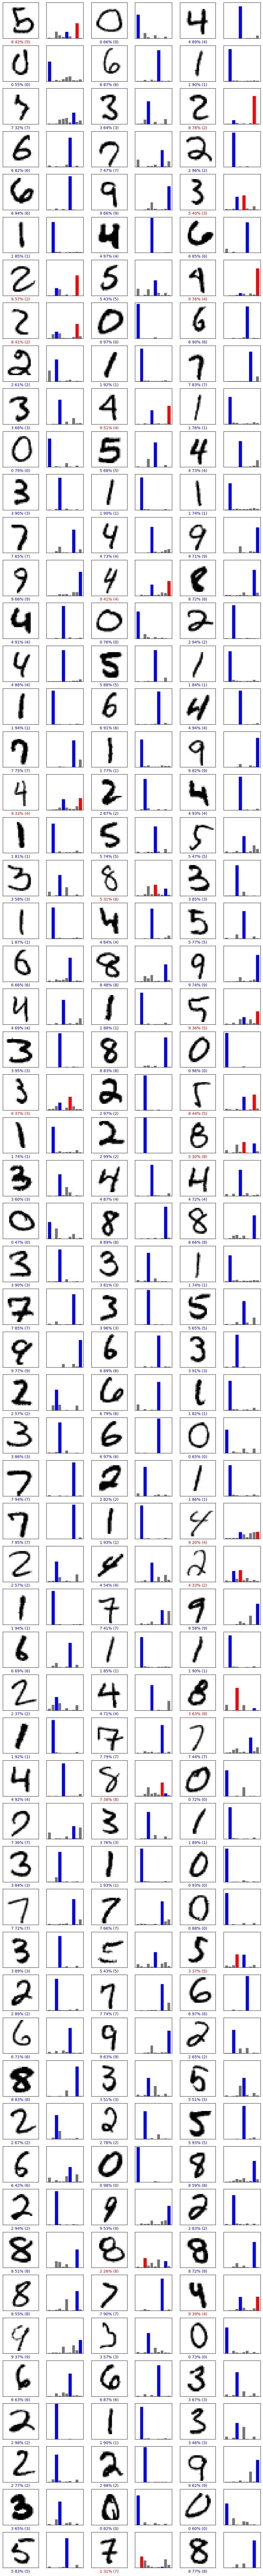

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array ,true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
num_rows = 60
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+720, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+720, predictions, test_labels)
    
plt.show()

# 95p